[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/1-inventarios-EDA.ipynb)

In [173]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preparación para el análisis exploratorio de los datos


*   Cargue de los datos
*   Elemento de lista



Configuración del las fuentes almacenadas en el repositorio de Github

In [2]:
sourcepath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Raw'
destpath = 'https://raw.githubusercontent.com/rjnakano/manejo-inventarios-pdg/main/Datos/Transformed'

## Cargue de los datos RAW del inventario
Los datos a tratar, corresponden a todos aquellos productos activos que han presentado correcciones durante los inventarios cíclicos y que están ubicados en la bodega principal de la empresa empezando desde enero de 2018

| Field | Description |
| :- | :-- |
| TDATE | Fecha en la que se realizó la corrección al inventario |
| SKU | Identificador del item |
| LOC | Ubicación del item en la bodega compuesta por tres dimensiones (pasillo, columna y estantería) |
| QTY | Cantidad de items revisados, donde los menores a 0 representan las unidades faltantes mientras que las mayores a 0 la unidades adicionales no contabilizadas |
| AISLE | Número del pasillo de la ubicación del item |
| COLUMN | Columna en del pasillo en la que se encuentra el item |
| SHELF | Número de la estantería en la que se encuentra el item |
| TYPE | Tipo de item |
| IG | Agrupación del item |
| IPG | Precio de venta del item |
| HTS | Clasificación fiscal (Gobierno - IDRS) del item |
| CLASS | Flag para identificar si un item se vende (1) o no (0) |
| PLANNING | Flag para identificar si un item se presupuesta (1) o no (0) |
| ABC | Pareto del nivel de inventario |
| UOM | Tipo de unidad de medida del item |
| CREATION | Fecha de creación del item en el sistema |
| CAT | Categoría de agrupación del item |
| COSTX | Valor de compra del item, el valor depende de la cantidad analizada |
| QTYBEFORE | Número de unidades antes de la corrección |
| QTYVAR | Por diligenciar |
| WEIGHT | Peso del item |
| LENGTH | Largo del item |
| HEIGHT | Altura del item |
| WIDTH | Ancho del item |
| CONTRPERC | Porcentaje de presencia del item |


In [98]:
filename = 'LOCTRANSCX.csv'
df = pd.read_csv(f"{sourcepath}/{filename}")

In [99]:
pd.set_option('max_columns', df.shape[1])
df.head(5)

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,IPG,HTS,CLASS,PLANNING,ABC,UOM,CREATION,CAT,COSTX,QTYBEFORE,QTYVAR,WEIGHT,LENGTH,HEIGHT,WIDTH,CONTRPERC
0,20180210,SKU3921,17Q3,-1.0,17.0,Q,3,LOC4,IG56,NaN,HTS119,1,1,B,PC,20161028,CAT17,-289.8802,38.0,-3,0.0,0.0,0.0,0.0,0.01
1,20180210,SKU3922,17Q2,1.0,17.0,Q,2,LOC4,IG56,NaN,HTS119,1,1,B,PC,20161028,CAT17,289.5527,4.0,25,0.0,0.0,0.0,0.0,0.00
2,20180210,SKU3923,17W2,4.0,17.0,W,2,LOC4,IG56,NaN,HTS119,1,1,C,PC,20161028,CAT17,1111.3121,8.0,50,0.0,0.0,0.0,0.0,0.00
3,20180210,SKU3924,17B2,-1.0,17.0,B,2,LOC4,IG56,NaN,HTS119,1,1,B,PC,20161028,CAT17,-266.8633,11.0,-9,0.0,0.0,0.0,0.0,0.00
4,20180210,SKU3926,15P7,-2.0,15.0,P,7,LOC4,IG56,NaN,HTS119,1,1,C,PC,20161028,CAT17,-517.0436,18.0,-11,0.0,0.0,0.0,0.0,0.00


In [100]:
df.tail(5)

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,IPG,HTS,CLASS,PLANNING,ABC,UOM,CREATION,CAT,COSTX,QTYBEFORE,QTYVAR,WEIGHT,LENGTH,HEIGHT,WIDTH,CONTRPERC
17002,20201213,SKU8964,23C10,1.0,23.0,C,10,LOC5,IG5,IPG1604,HTS67,1,0,C,BX,20000930,CAT2,316.3834,0.0,100,45.0,162.0,2.375,6.00,0.0
17003,20201213,SKU8971,21I2,2.0,21.0,I,2,LOC4,IG5,IPG1604,HTS67,1,0,C,BX,20001001,CAT2,626.9100,0.0,100,45.0,162.0,2.375,6.00,0.0
17004,20201213,SKU8972,22F8,15.0,22.0,F,8,LOC4,IG5,IPG1604,HTS67,1,0,C,BX,20000930,CAT2,4959.6974,11.0,136,45.0,162.0,2.375,6.00,0.0
17005,20201213,SKU8972,24I4,-4.0,24.0,I,4,LOC4,IG5,IPG1604,HTS67,1,0,C,BX,20000930,CAT2,-1322.5860,4.0,-100,45.0,162.0,2.375,6.00,0.0
17006,20201213,SKU8979,20G1,-1.0,20.0,G,1,LOC4,IG5,IPG1880,HTS67,1,0,C,BX,20050603,CAT2,-255.2001,2.0,-50,39.0,162.0,2.250,4.75,0.0


In [106]:
df.shape

(17007, 25)

## Eliminación de duplicados
Debido al proceso de generación de los datos, en el cual se toma la información de dos fuentes diferentes, cabe la posibilidad de la generación de duplicados los cuales deberán ser manejados.


*   Identificación de registros duplicados 
*   Validación de registros
*   Eliminación de los registros extras
*   Verificación del proceso



In [107]:
df[df.duplicated()==True]

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,IPG,HTS,CLASS,PLANNING,ABC,UOM,CREATION,CAT,COSTX,QTYBEFORE,QTYVAR,WEIGHT,LENGTH,HEIGHT,WIDTH,CONTRPERC
10286,20201213,SKU10071,07G7,1.0,7.0,G,7,LOC4,IG8,IPG1453,HTS15,1,1,A,BX,20150813,CAT3,2094.1441,0.0,100,33.00,13.0,8.5,13.0,0.10
10288,20201213,SKU10071,10K2,1.0,10.0,K,2,LOC4,IG8,IPG1453,HTS15,1,1,A,BX,20150813,CAT3,2094.1441,0.0,100,33.00,13.0,8.5,13.0,0.10
10355,20201213,SKU10231,15U2,1500.0,15.0,U,2,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10358,20201213,SKU10231,99D28,1500.0,99.0,D,28,LOC5,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10469,20201213,SKU10347,15G2,2.0,15.0,G,2,LOC4,IG57,NaN,HTS151,1,0,A,BX,20180924,CAT17,433.5837,0.0,100,2.00,4.0,3.0,16.0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16899,20201213,SKU1759,11G2,1.0,11.0,G,2,LOC4,IG64,NaN,HTS15,1,1,A,BX,20131101,CAT14,681.1098,0.0,100,22.00,16.0,14.0,12.0,0.09
16901,20201213,SKU1760,11U3,1.0,11.0,U,3,LOC4,IG64,NaN,HTS15,1,1,A,BX,20131101,CAT14,791.6199,0.0,100,22.00,16.0,14.0,12.0,0.02
16903,20201213,SKU1760,37I3,1.0,37.0,I,3,LOC4,IG64,NaN,HTS15,1,1,A,BX,20131101,CAT14,791.6199,0.0,100,22.00,16.0,14.0,12.0,0.02
16954,20201213,SKU6156,21G9,1.0,21.0,G,9,LOC4,IG7,IPG1815,HTS95,1,1,A,BX,20160721,CAT8,1023.6613,0.0,100,60.00,192.0,3.0,7.0,0.04


In [108]:
df[(df.SKU == 'SKU10231') & (df.TDATE == 20201213)]

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,IPG,HTS,CLASS,PLANNING,ABC,UOM,CREATION,CAT,COSTX,QTYBEFORE,QTYVAR,WEIGHT,LENGTH,HEIGHT,WIDTH,CONTRPERC
10354,20201213,SKU10231,15U2,1500.0,15.0,U,2,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10355,20201213,SKU10231,15U2,1500.0,15.0,U,2,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10356,20201213,SKU10231,17R6,-3710.0,17.0,R,6,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,-2865.7695,3710.0,-100,0.01,0.5,0.5,0.5,0.05
10357,20201213,SKU10231,99D28,1500.0,99.0,D,28,LOC5,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10358,20201213,SKU10231,99D28,1500.0,99.0,D,28,LOC5,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05


In [109]:
df.drop_duplicates(keep='first', inplace=True)
df[(df.SKU == 'SKU10231') & (df.TDATE == 20201213)]

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,IPG,HTS,CLASS,PLANNING,ABC,UOM,CREATION,CAT,COSTX,QTYBEFORE,QTYVAR,WEIGHT,LENGTH,HEIGHT,WIDTH,CONTRPERC
10354,20201213,SKU10231,15U2,1500.0,15.0,U,2,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05
10356,20201213,SKU10231,17R6,-3710.0,17.0,R,6,LOC4,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,-2865.7695,3710.0,-100,0.01,0.5,0.5,0.5,0.05
10357,20201213,SKU10231,99D28,1500.0,99.0,D,28,LOC5,IG51,IPG294,HTS15,1,1,A,PC,20170816,CAT16,1158.6669,0.0,100,0.01,0.5,0.5,0.5,0.05


In [110]:
df.shape

(16333, 25)

## Corrección de formatos y nombres de campos

### Cambio de tipos

Es necesario modificar ciertas columnas para que se comporten de acuerdo a las definiciones del negocio

| **Field** | **From** | **To** |
| :-: | :-: | :-: |
| TDATE | Entero | Fecha |
| CREATION | Entero | Fecha |

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16333 entries, 0 to 17006
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TDATE      16333 non-null  int64  
 1   SKU        16333 non-null  object 
 2   LOC        16333 non-null  object 
 3   QTY        16333 non-null  float64
 4   AISLE      16261 non-null  float64
 5   COLUMN     16261 non-null  object 
 6   SHELF      16333 non-null  int64  
 7   TYPE       16261 non-null  object 
 8   IG         16333 non-null  object 
 9   IPG        8225 non-null   object 
 10  HTS        16323 non-null  object 
 11  CLASS      16333 non-null  int64  
 12  PLANNING   16333 non-null  int64  
 13  ABC        16333 non-null  object 
 14  UOM        16333 non-null  object 
 15  CREATION   16333 non-null  int64  
 16  CAT        16333 non-null  object 
 17  COSTX      16333 non-null  float64
 18  QTYBEFORE  16333 non-null  float64
 19  QTYVAR     16333 non-null  int64  
 20  WEIGHT

In [112]:
df.TDATE = pd.to_datetime(df.TDATE, format='%Y%m%d') 
df.CREATION = pd.to_datetime(df.CREATION, format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16333 entries, 0 to 17006
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TDATE      16333 non-null  datetime64[ns]
 1   SKU        16333 non-null  object        
 2   LOC        16333 non-null  object        
 3   QTY        16333 non-null  float64       
 4   AISLE      16261 non-null  float64       
 5   COLUMN     16261 non-null  object        
 6   SHELF      16333 non-null  int64         
 7   TYPE       16261 non-null  object        
 8   IG         16333 non-null  object        
 9   IPG        8225 non-null   object        
 10  HTS        16323 non-null  object        
 11  CLASS      16333 non-null  int64         
 12  PLANNING   16333 non-null  int64         
 13  ABC        16333 non-null  object        
 14  UOM        16333 non-null  object        
 15  CREATION   16333 non-null  datetime64[ns]
 16  CAT        16333 non-null  object       

In [113]:
df.TDATE.head()

0   2018-02-10
1   2018-02-10
2   2018-02-10
3   2018-02-10
4   2018-02-10
Name: TDATE, dtype: datetime64[ns]

### Renombramiento
| **Original Name** | **New Name** |
| :-: | :-: |
| WEIGHT | PESO |
| LENGTH | LARGO |
| HEIGHT | ALTO |
| WIDTH | ANCHO |

In [114]:
df = df.rename(columns={"WEIGHT":"PESO","LENGTH":"LARGO","HEIGHT":"ALTO","WIDTH":"ANCHO" })

## Manejo de registros con nulos
* Eliminación de las columnas **IPG** por su gran cantidad de valores vacios y **CREATION** ya que define la fecha de creación en el sistema del producto en su tabla maestra.
* Eliminación de registros con todos los valores nulos
* Crearemos dos data frames:
    * df_na_free: eliminará los registros nulos. 
    * df_imp: Reemplazará los valores NA con valores del negocio.

In [115]:
# Borramos las columnas irrelevantes
df = df.drop(['CREATION','IPG'], axis=1)

In [116]:
# Borramos cualquier fila con todos los valores nulos
df.dropna(axis=0,how="all", inplace=True)

In [117]:
# Finding the null values.
print(df.isnull().sum())

TDATE         0
SKU           0
LOC           0
QTY           0
AISLE        72
COLUMN       72
SHELF         0
TYPE         72
IG            0
HTS          10
CLASS         0
PLANNING      0
ABC           0
UOM           0
CAT           0
COSTX         0
QTYBEFORE     0
QTYVAR        0
PESO          0
LARGO         0
ALTO          0
ANCHO         0
CONTRPERC     0
dtype: int64


### Eliminar registros con valores nulos

In [118]:

# Creamos df_na_free eliminando los registros con valores NA
df_na_free = df.dropna(axis=0,how="any", inplace=False)
print(df_na_free.isnull().sum())
print(df_na_free.shape)

TDATE        0
SKU          0
LOC          0
QTY          0
AISLE        0
COLUMN       0
SHELF        0
TYPE         0
IG           0
HTS          0
CLASS        0
PLANNING     0
ABC          0
UOM          0
CAT          0
COSTX        0
QTYBEFORE    0
QTYVAR       0
PESO         0
LARGO        0
ALTO         0
ANCHO        0
CONTRPERC    0
dtype: int64
(16251, 23)


### Imputación de valores nulos
De acuerdo a las definiciones del negocio, es válido imputar las ubicaciones de los items que tienen valores nulos, con un sólo valor que les permita reconocerlo en el sistema, aunque no esté ubicado claramente dentro de la bodega.

In [119]:
df_imp = df

In [120]:
df_imp.loc[pd.isnull(df_imp['TYPE']), 'TYPE'] = 'AREA' 
df_imp.loc[pd.isnull(df_imp['AISLE']), 'AISLE'] = df_imp['LOC']
df_imp.loc[pd.isnull(df_imp['COLUMN']), 'COLUMN'] = ''
df_imp['HTS'].fillna("No HTS", inplace = True) 
print(df_imp.isnull().sum())
print(df_imp.shape)

TDATE        0
SKU          0
LOC          0
QTY          0
AISLE        0
COLUMN       0
SHELF        0
TYPE         0
IG           0
HTS          0
CLASS        0
PLANNING     0
ABC          0
UOM          0
CAT          0
COSTX        0
QTYBEFORE    0
QTYVAR       0
PESO         0
LARGO        0
ALTO         0
ANCHO        0
CONTRPERC    0
dtype: int64
(16333, 23)


# Análisis exploratorio de datos

## Análisis Univariado

### Variables Categóricas

In [219]:
df.describe()

,QTY,SHELF,CLASS,PLANNING,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC
count,16333.000000,16333.000000,16333.000000,16333.000000,1.633300e+04,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000
mean,-23.212714,3.814547,1.075246,0.829425,-6.718157e+01,544.853870,51.371089,13.663001,54.039599,4.842184,5.714558,0.089230
std,1271.115065,2.835252,0.263797,0.396746,1.332430e+04,4519.798788,1045.685816,43.087181,64.998684,4.700551,4.384212,0.420496
min,-80500.000000,0.000000,1.000000,0.000000,-2.298156e+05,-44.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,2.000000,1.000000,1.000000,-7.360974e+02,2.000000,-50.000000,0.460000,6.000000,1.500000,2.500000,0.000000
50%,-1.000000,3.000000,1.000000,1.000000,-3.356930e+01,18.000000,-1.000000,2.037000,12.000000,3.500000,5.500000,0.010000
75%,4.000000,5.000000,1.000000,1.000000,6.180600e+02,114.000000,48.000000,10.000000,102.000000,7.250000,8.000000,0.030000
max,74000.000000,36.000000,2.000000,9.000000,1.374824e+06,322475.000000,73950.000000,3250.000000,241.000000,50.500000,48.000000,4.630000


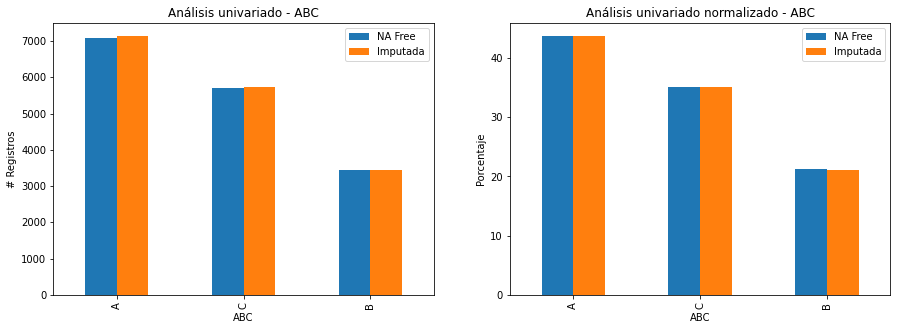

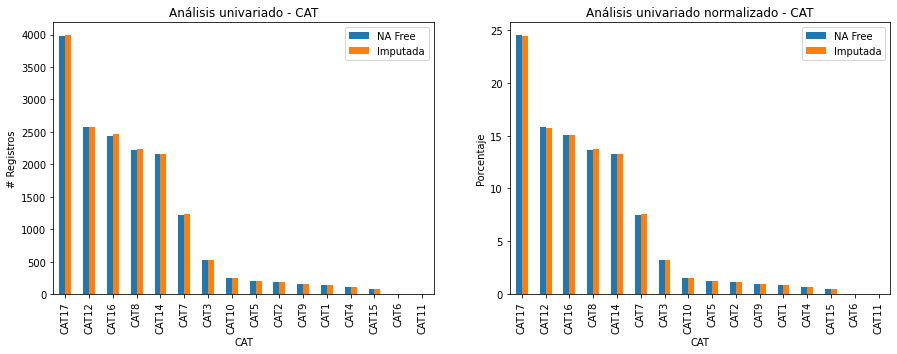

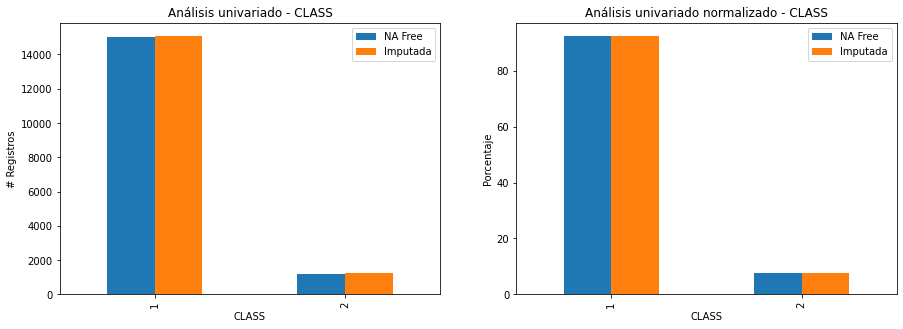

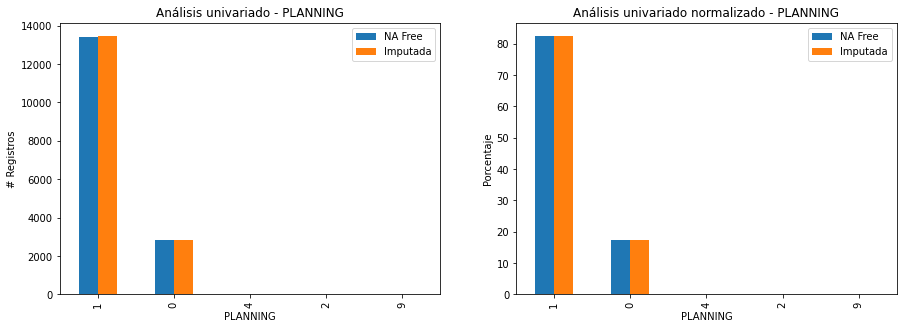

In [220]:
import matplotlib.pyplot as plt
def analisis_univariado_categorico(colname):
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  chart = pd.DataFrame({
      'NA Free':df_na_free[colname].value_counts(),
      'Imputada':df_imp[colname].value_counts()})
  chart.plot(kind= 'bar', title = f'Análisis univariado - {colname}', ax = axs[0])
  axs[0].set_ylabel('# Registros')
  axs[0].set_xlabel(colname)
  
  chart = pd.DataFrame({
      'NA Free':df_na_free[colname].value_counts(normalize=True)*100,
      'Imputada':df_imp[colname].value_counts(normalize=True)*100})
  chart.plot(kind= 'bar', title = f'Análisis univariado normalizado - {colname}', ax = axs[1])
  axs[1].set_ylabel('Porcentaje')
  axs[1].set_xlabel(colname)


analisis_univariado_categorico('ABC')
analisis_univariado_categorico('CAT')
analisis_univariado_categorico('CLASS')
analisis_univariado_categorico('PLANNING')

In [221]:
df['ABC'].value_counts()

A    7139
C    5735
B    3459
Name: ABC, dtype: int64

In [222]:
df['CLASS'].value_counts()

1    15104
2     1229
Name: CLASS, dtype: int64

In [223]:
df['PLANNING'].value_counts(normalize=True)

1    0.825629
0    0.173453
4    0.000551
2    0.000245
9    0.000122
Name: PLANNING, dtype: float64

In [224]:
df['CAT'].value_counts(normalize=True)*100

CAT17    24.429070
CAT12    15.759505
CAT16    15.098267
CAT8     13.683953
CAT14    13.230882
CAT7      7.555256
CAT3      3.232719
CAT10     1.549011
CAT5      1.230637
CAT2      1.163289
CAT9      0.979612
CAT1      0.893896
CAT4      0.636748
CAT15     0.508174
CAT6      0.042858
CAT11     0.006123
Name: CAT, dtype: float64

In [225]:
contingency = pd.crosstab(df_na_free['CLASS'], df_na_free['PLANNING']) 
contingency
contingency = pd.crosstab(df_imp['CLASS'], df_imp['PLANNING']) 
contingency 

PLANNING,0,1,2,4,9
CLASS,,,,,
1,1604,13485,4,9,2
2,1229,0,0,0,0


In [226]:
contingency = pd.crosstab(df_imp['CLASS'], df_imp['PLANNING']) 
contingency 

PLANNING,0,1,2,4,9
CLASS,,,,,
1,1604,13485,4,9,2
2,1229,0,0,0,0


In [227]:
contingency_pct= pd.crosstab(df['CLASS'], df['PLANNING'],normalize='index') 

In [228]:
contingency_pct

PLANNING,0,1,2,4,9
CLASS,,,,,
1,0.106197,0.89281,0.000265,0.000596,0.000132
2,1.000000,0.00000,0.000000,0.000000,0.000000


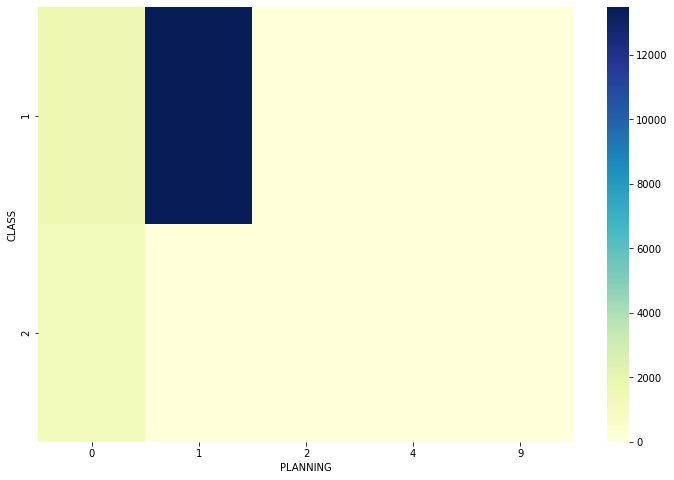

In [229]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency, annot=False, cmap="YlGnBu")

In [230]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
# Now, p < 0.05 is the usual test for dependence. In this case p is greater than 0.05, so we believe the variables are independent

0.0


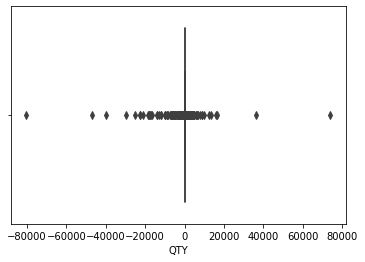

In [231]:
sns.boxplot(x=df['QTY'])

In [232]:
z = np.abs(stats.zscore(df.QTY))
#z = stats.zscore(df.QTY)
df['Zqty']=z
print(z)
# Z score = número de desviaciones estándar respecto a la media

[0.01747552 0.01904899 0.02140919 ... 0.03006328 0.01511531 0.01747552]


In [233]:
df.sample(5)

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,HTS,CLASS,PLANNING,ABC,UOM,CAT,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty
9240,2020-01-02,SKU3079,07Y1,-1.0,7,Y,1,LOC4,IG27,HTS50,2,0,C,RL,CAT7,-170.8939,9.0,-11,0.0000,0.00,0.00,0.00,0.00,0.017476
1552,2018-05-01,SKU8001,18D4,4.0,18,D,4,LOC4,IG45,HTS24,1,1,A,PC,CAT17,166.9263,69.0,6,2.3700,96.00,1.50,1.50,0.01,0.021409
1199,2018-04-04,SKU2905,32C2,16.0,32,C,2,LOC4,IG61,HTS6,1,1,A,BX,CAT14,13337.9783,13.0,123,79.7000,192.00,6.00,6.00,4.63,0.030850
13993,2020-12-13,SKU4657,03R5,56.0,3,R,5,LOC4,IG30,HTS37,1,0,C,YD,CAT12,1780.1035,207.0,27,1.9513,98.43,7.44,7.44,0.00,0.062319
10862,2020-12-13,SKU10747,12P8,-1.0,12,P,8,LOC4,IG51,HTS15,1,1,C,BX,CAT16,-513.9359,1.0,-100,26.0000,32.50,6.00,4.50,0.00,0.017476


In [234]:
df['QTY'].describe()

count    16333.000000
mean       -23.212714
std       1271.115065
min     -80500.000000
25%         -6.000000
50%         -1.000000
75%          4.000000
max      74000.000000
Name: QTY, dtype: float64

In [235]:
df['Zqty'].describe()

count    16333.000000
mean         0.100924
std          0.994925
min          0.000167
25%          0.016689
50%          0.019049
75%          0.026916
max         63.313899
Name: Zqty, dtype: float64

In [236]:
print('Dentro de 1 desviación estándar:', df.loc[df['Zqty'] < 1,'Zqty'].count(), round(df.loc[df['Zqty'] < 1,'Zqty'].count()/len(df)*100,2),'%')
print('Entre 1 y 2 desviaciones estándar:', df.loc[(df['Zqty'] >= 1) & (df['Zqty'] < 2),'Zqty'].count())
print('Entre 2 y 3 desviaciones estándar:', df.loc[(df['Zqty'] >= 2) & (df['Zqty'] < 3),'Zqty'].count())
print('Más de de 3 desviación estándar:', df.loc[df['Zqty'] > 3,'Zqty'].count())
print(df.loc[df['Zqty'] < 1,'Zqty'].count() + df.loc[(df['Zqty'] >= 1) & (df['Zqty'] < 2),'Zqty'].count() + df.loc[(df['Zqty'] >= 2) & (df['Zqty'] < 3),'Zqty'].count() + df.loc[df['Zqty'] > 3,'Zqty'].count())

Dentro de 1 desviación estándar: 16126 98.73 %
Entre 1 y 2 desviaciones estándar: 112
Entre 2 y 3 desviaciones estándar: 27
Más de de 3 desviación estándar: 68
16333


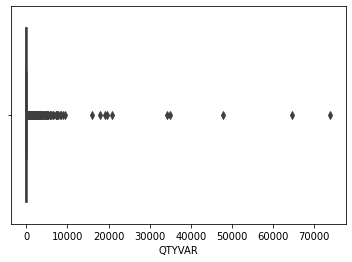

In [237]:
sns.boxplot(x=df['QTYVAR'])

In [238]:
df[df['QTYVAR']>10000]

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,HTS,CLASS,PLANNING,ABC,UOM,CAT,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty
1388,2018-04-23,SKU7186,14O7,159.0,14,O,7,LOC4,IG45,HTS16,1,0,B,PC,CAT17,4.912834e+03,1.0,15900,0.800,6.5,4.0,7.0,0.00,0.143353
2449,2018-07-23,SKU1916,16O4,208.0,16,O,4,LOC4,IG49,HTS119,1,1,C,PC,CAT16,4.778136e+03,1.0,20800,1.130,30.0,1.5,1.5,0.00,0.181903
3271,2018-09-19,SKU6513,02K1,1719.0,2,K,1,LOC4,IG38,HTS61,1,1,A,SQFT,CAT8,3.372806e+03,9.0,19100,0.060,148.0,3.0,11.0,0.16,1.370660
4142,2018-10-29,SKU10933,20D2,647.0,20,D,2,LOC4,IG48,HTS24,1,0,B,TB,CAT17,1.374824e+06,1.0,64700,5.000,192.0,1.0,2.0,0.00,0.527280
5215,2019-01-16,SKU6481,02P1,3327.0,2,P,1,LOC4,IG38,HTS61,1,1,A,SQFT,CAT8,8.974852e+03,17.0,19571,0.100,148.0,3.0,11.0,0.02,2.635729
5228,2019-01-16,SKU6580,02P1,1746.0,2,P,1,LOC4,IG38,HTS61,1,1,A,SQFT,CAT8,9.931164e+03,5.0,34920,0.070,148.0,3.0,7.0,0.19,1.391901
5232,2019-01-16,SKU6621,02K3,1479.0,2,K,3,LOC4,IG38,HTS61,1,1,A,SQFT,CAT8,4.704755e+03,2.0,73950,0.020,148.0,3.0,7.0,0.01,1.181843
5562,2019-01-29,SKU4707,04D1,343.0,4,D,1,LOC4,IG30,HTS46,1,1,A,YD,CAT12,8.827518e+03,1.0,34300,2.336,112.0,8.5,8.5,0.16,0.288112
9155,2019-12-23,SKU7427,41E13,179.0,41,E,13,LOC5,IG26,HTS56,1,1,A,BX,CAT7,2.468232e+04,1.0,17900,4.000,13.0,3.0,12.0,0.32,0.159088
10583,2020-12-13,SKU10605,23F1,479.0,23,F,1,LOC4,IG55,HTS95,1,1,C,FT,CAT16,1.151114e+03,1.0,47900,70.000,194.0,4.0,4.0,0.00,0.395108


In [239]:
z = np.abs(stats.zscore(df.QTYVAR))
#z = stats.zscore(df.QTYVAR)
df['ZqtyVar']=z
print(z)
# Z score = número de desviaciones estándar respecto a la media

[0.05199722 0.02521971 0.00131123 ... 0.08093397 0.14476215 0.09694517]


In [240]:
df.sample(5)

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,HTS,CLASS,PLANNING,ABC,UOM,CAT,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty,ZqtyVar
16655,2020-12-13,SKU9163,14T7,3.0,14,T,7,LOC4,IG53,HTS119,1,1,B,PC,CAT16,263.6073,45.0,7,4.95,36.75,2.50,3.0,0.01,0.020622,0.042434
13514,2020-12-13,SKU4190,16Q5,-1.0,16,Q,5,LOC4,IG46,HTS121,1,1,B,PR,CAT17,-43.5062,1.0,-100,1.05,10.00,3.63,3.5,0.01,0.017476,0.144762
7096,2019-04-25,SKU7815,16U1,-1.0,16,U,1,LOC4,IG45,HTS24,1,1,B,PC,CAT17,-47.2957,70.0,-1,2.55,48.00,2.00,2.0,0.00,0.017476,0.050085
7320,2019-05-13,SKU7919,14V4,-30.0,14,V,4,LOC4,IG48,HTS15,2,0,B,PC,CAT17,-696.1616,30.0,-100,0.20,3.00,1.00,2.0,0.00,0.005340,0.144762
6375,2019-03-19,SKU8096,12F4,4.0,12,F,4,LOC4,IG45,HTS24,1,1,C,PR,CAT17,99.8789,91.0,4,1.00,11.00,1.00,8.0,0.00,0.021409,0.045303


In [241]:
df['QTYVAR'].describe()

count    16333.000000
mean        51.371089
std       1045.685816
min       -100.000000
25%        -50.000000
50%         -1.000000
75%         48.000000
max      73950.000000
Name: QTYVAR, dtype: float64

In [242]:
df['ZqtyVar'].describe()

count    16333.000000
mean         0.122591
std          0.992488
min          0.000355
25%          0.046506
50%          0.052954
75%          0.142140
max         70.672175
Name: ZqtyVar, dtype: float64

In [243]:
print('Dentro de 1 desviación estándar:', df.loc[df['ZqtyVar'] < 1,'ZqtyVar'].count(), round(df.loc[df['ZqtyVar'] < 1,'ZqtyVar'].count()/len(df)*100,2),'%')
print('Entre 1 y 2 desviaciones estándar:', df.loc[(df['ZqtyVar'] >= 1) & (df['ZqtyVar'] < 2),'ZqtyVar'].count())
print('Entre 2 y 3 desviaciones estándar:', df.loc[(df['ZqtyVar'] >= 2) & (df['ZqtyVar'] < 3),'ZqtyVar'].count())
print('Más de de 3 desviación estándar:', df.loc[df['ZqtyVar'] > 3,'ZqtyVar'].count())
print(df.loc[df['ZqtyVar'] < 1,'ZqtyVar'].count() + df.loc[(df['ZqtyVar'] >= 1) & (df['ZqtyVar'] < 2),'ZqtyVar'].count() + df.loc[(df['ZqtyVar'] >= 2) & (df['ZqtyVar'] < 3),'ZqtyVar'].count() + df.loc[df['ZqtyVar'] > 3,'ZqtyVar'].count())

Dentro de 1 desviación estándar: 16199 99.18 %
Entre 1 y 2 desviaciones estándar: 57
Entre 2 y 3 desviaciones estándar: 26
Más de de 3 desviación estándar: 51
16333


In [244]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

QTY            10.000000
SHELF           3.000000
CLASS           0.000000
PLANNING        0.000000
COSTX        1354.157400
QTYBEFORE     112.000000
QTYVAR         98.000000
PESO            9.540000
LARGO          96.000000
ALTO            5.750000
ANCHO           5.500000
CONTRPERC       0.030000
Zqty            0.010228
ZqtyVar         0.095634
dtype: float64


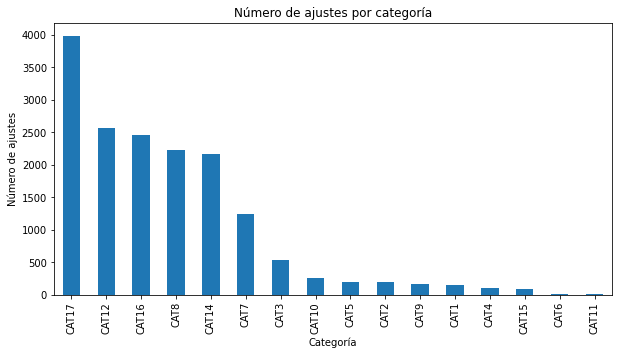

In [245]:
# Plotting a Histogram
df.CAT.value_counts().plot(kind='bar', figsize=(10,5))
# nlargest(40).
plt.title('Número de ajustes por categoría')
plt.ylabel('Número de ajustes')
plt.xlabel('Categoría');

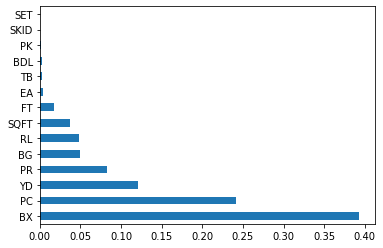

In [246]:
df.UOM.value_counts(normalize=True).plot.barh()
plt.show()

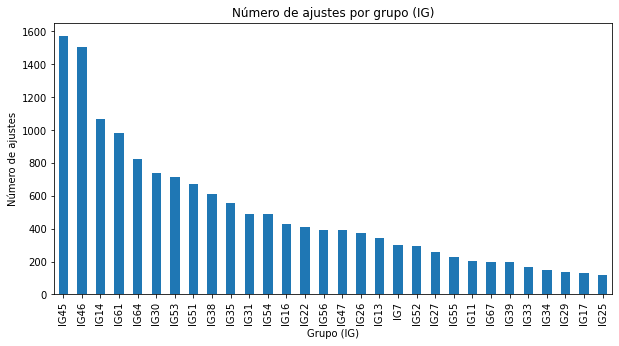

In [247]:
# Plotting a Histogram
df.IG.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title('Número de ajustes por grupo (IG)')
plt.ylabel('Número de ajustes')
plt.xlabel('Grupo (IG)');

HTS119    23.12
HTS15     17.98
HTS24      9.35
HTS6       7.53
HTS61      4.62
HTS95      4.29
HTS48      3.22
HTS51      3.13
HTS55      2.66
HTS56      2.57
HTS121     2.46
HTS50      1.57
HTS16      1.46
HTS36      1.20
HTS46      0.99
Name: HTS, dtype: float64 %


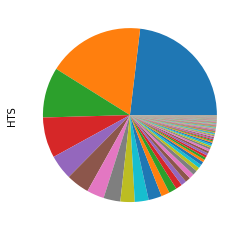

In [248]:
print(round(df.HTS.value_counts(normalize=True).nlargest(15)*100,2),'%')
df.HTS.value_counts(normalize=True).plot.pie(labels=None)
plt.show()

,QTY,SHELF,CLASS,PLANNING,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty,ZqtyVar
QTY,1.000000,-0.012785,0.004871,0.000136,0.109472,-0.287369,0.030806,0.005541,0.012558,0.015803,0.018708,0.002922,-0.335535,0.021282
SHELF,-0.012785,1.000000,0.068924,-0.067587,-0.025366,-0.002054,-0.012306,-0.029280,-0.006146,-0.009147,-0.047383,0.006368,-0.003302,-0.002959
CLASS,0.004871,0.068924,1.000000,-0.596359,-0.003123,-0.032906,-0.011887,-0.011424,-0.103600,-0.097689,-0.073103,-0.058905,-0.022949,-0.006088
PLANNING,0.000136,-0.067587,-0.596359,1.000000,-0.009597,0.032147,0.004980,0.003878,0.070446,0.064727,0.048574,0.087558,0.011159,0.000364
COSTX,0.109472,-0.025366,-0.003123,-0.009597,1.000000,-0.014886,0.433033,-0.004835,0.008786,-0.007550,-0.006620,-0.022204,-0.000228,0.414685
QTYBEFORE,-0.287369,-0.002054,-0.032906,0.032147,-0.014886,1.000000,-0.006658,-0.033703,-0.053230,-0.077967,-0.082413,-0.016445,0.400118,-0.007595
QTYVAR,0.030806,-0.012306,-0.011887,0.004980,0.433033,-0.006658,1.000000,-0.002857,0.028041,-0.003830,0.003290,0.006088,0.019121,0.994428
PESO,0.005541,-0.029280,-0.011424,0.003878,-0.004835,-0.033703,-0.002857,1.000000,0.298196,0.211847,0.174503,0.184357,-0.022004,-0.004037
LARGO,0.012558,-0.006146,-0.103600,0.070446,0.008786,-0.053230,0.028041,0.298196,1.000000,0.104923,0.183552,0.208170,-0.024292,0.031861
ALTO,0.015803,-0.009147,-0.097689,0.064727,-0.007550,-0.077967,-0.003830,0.211847,0.104923,1.000000,0.722781,0.157624,-0.026205,-0.001384


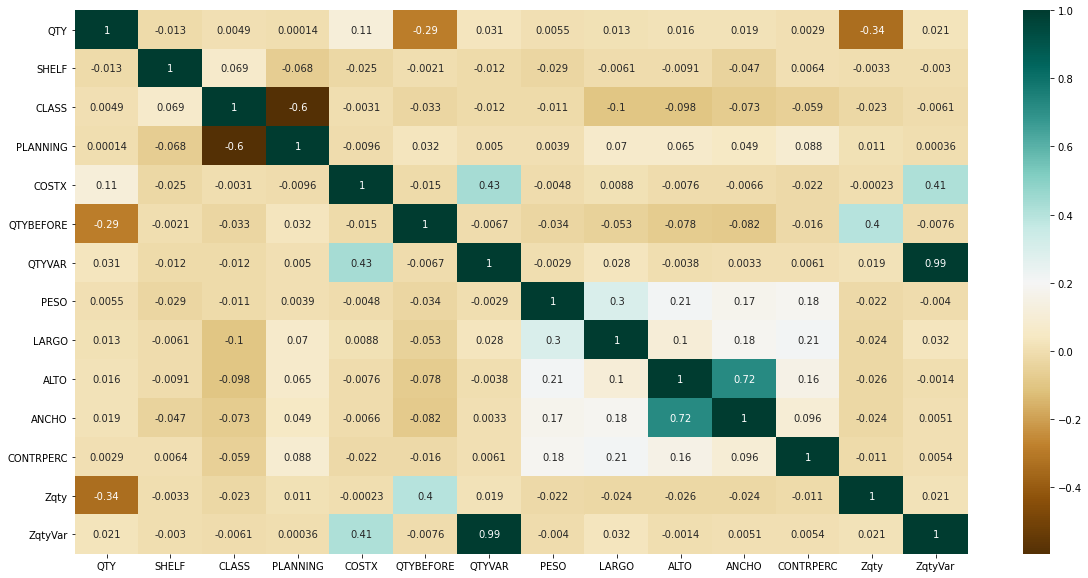

In [249]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

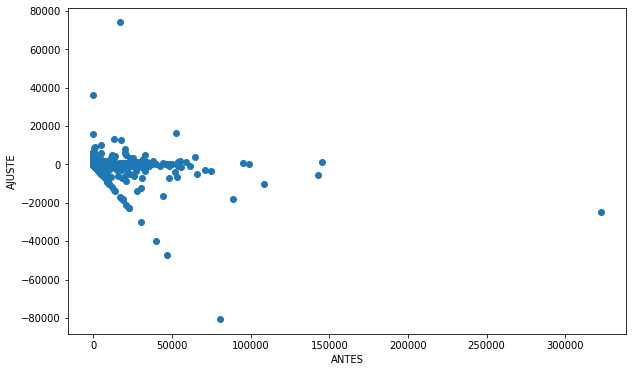

In [250]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['QTYBEFORE'], df['QTY'])
ax.set_xlabel('ANTES')
ax.set_ylabel('AJUSTE')
plt.show()

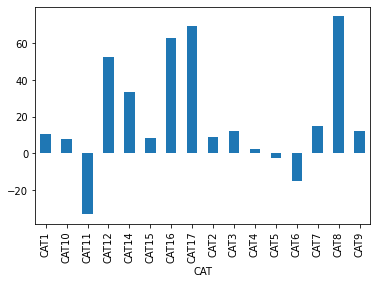

In [251]:
df.groupby('CAT')['QTYVAR'].mean().plot.bar()
#print(result)
plt.show()

In [252]:
df.describe()

,QTY,SHELF,CLASS,PLANNING,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty,ZqtyVar
count,16333.000000,16333.000000,16333.000000,16333.000000,1.633300e+04,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000
mean,-23.212714,3.814547,1.075246,0.829425,-6.718157e+01,544.853870,51.371089,13.663001,54.039599,4.842184,5.714558,0.089230,0.100924,0.122591
std,1271.115065,2.835252,0.263797,0.396746,1.332430e+04,4519.798788,1045.685816,43.087181,64.998684,4.700551,4.384212,0.420496,0.994925,0.992488
min,-80500.000000,0.000000,1.000000,0.000000,-2.298156e+05,-44.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000167,0.000355
25%,-6.000000,2.000000,1.000000,1.000000,-7.360974e+02,2.000000,-50.000000,0.460000,6.000000,1.500000,2.500000,0.000000,0.016689,0.046506
50%,-1.000000,3.000000,1.000000,1.000000,-3.356930e+01,18.000000,-1.000000,2.037000,12.000000,3.500000,5.500000,0.010000,0.019049,0.052954
75%,4.000000,5.000000,1.000000,1.000000,6.180600e+02,114.000000,48.000000,10.000000,102.000000,7.250000,8.000000,0.030000,0.026916,0.142140
max,74000.000000,36.000000,2.000000,9.000000,1.374824e+06,322475.000000,73950.000000,3250.000000,241.000000,50.500000,48.000000,4.630000,63.313899,70.672175


In [253]:
df.sample(5)

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,HTS,CLASS,PLANNING,ABC,UOM,CAT,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty,ZqtyVar
13722,2020-12-13,SKU4353,12D6,1.0,12,D,6,LOC4,IG46,HTS16,1,1,B,PR,CAT17,54.0575,78.0,1,1.050,10.00,3.63,3.5,0.01,0.019049,0.048172
4991,2018-12-10,SKU9485,02P9,1.0,2,P,9,LOC4,IG26,HTS56,2,0,C,BX,CAT7,114.4261,11.0,9,0.278,0.00,0.00,0.0,0.00,0.019049,0.040521
15138,2020-12-13,SKU6963,22F10,-1.0,22,F,10,LOC5,IG39,HTS95,1,1,A,BX,CAT9,-1015.8983,1.0,-100,30.000,8.00,8.00,8.0,0.01,0.017476,0.144762
4943,2018-12-05,SKU6016,02H9,-5.0,2,H,9,LOC4,IG52,HTS119,1,1,A,PC,CAT16,-699.6083,88.0,-6,5.600,97.75,3.00,2.5,0.04,0.014329,0.054866
3461,2018-09-26,SKU11181,16C3,-7100.0,16,C,3,LOC4,IG53,HTS15,1,1,A,PC,CAT16,-3490.3959,47800.0,-15,0.010,1.50,1.06,1.0,0.01,5.567556,0.063473


In [254]:
df.query('LARGO > ALTO')

,TDATE,SKU,LOC,QTY,AISLE,COLUMN,SHELF,TYPE,IG,HTS,CLASS,PLANNING,ABC,UOM,CAT,COSTX,QTYBEFORE,QTYVAR,PESO,LARGO,ALTO,ANCHO,CONTRPERC,Zqty,ZqtyVar
28,2018-02-10,SKU3992,12I6,-144.0,12,I,6,LOC4,IG46,HTS119,1,1,B,PC,CAT17,-8177.0401,144.0,-100,1.7,36.5,3.250,3.00,0.01,0.095028,0.144762
29,2018-02-10,SKU3992,17E5,-4.0,17,E,5,LOC4,IG46,HTS119,1,1,B,PC,CAT17,-227.1400,102.0,-4,1.7,36.5,3.250,3.00,0.01,0.015115,0.052954
30,2018-02-10,SKU3992,17V1,3.0,17,V,1,LOC4,IG46,HTS119,1,1,B,PC,CAT17,170.3550,158.0,2,1.7,36.5,3.250,3.00,0.01,0.020622,0.047216
31,2018-02-10,SKU3993,13L6,-6.0,13,L,6,LOC4,IG46,HTS119,1,1,A,PC,CAT17,-340.7100,97.0,-6,1.7,36.5,3.250,3.00,0.04,0.013542,0.054866
32,2018-02-10,SKU3993,13T1,-52.0,13,T,1,LOC4,IG46,HTS119,1,1,A,PC,CAT17,-2952.8200,53.0,-98,1.7,36.5,3.250,3.00,0.04,0.022648,0.142849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,2020-12-13,SKU8964,23C10,1.0,23,C,10,LOC5,IG5,HTS67,1,0,C,BX,CAT2,316.3834,0.0,100,45.0,162.0,2.375,6.00,0.00,0.019049,0.046506
17003,2020-12-13,SKU8971,21I2,2.0,21,I,2,LOC4,IG5,HTS67,1,0,C,BX,CAT2,626.9100,0.0,100,45.0,162.0,2.375,6.00,0.00,0.019836,0.046506
17004,2020-12-13,SKU8972,22F8,15.0,22,F,8,LOC4,IG5,HTS67,1,0,C,BX,CAT2,4959.6974,11.0,136,45.0,162.0,2.375,6.00,0.00,0.030063,0.080934
17005,2020-12-13,SKU8972,24I4,-4.0,24,I,4,LOC4,IG5,HTS67,1,0,C,BX,CAT2,-1322.5860,4.0,-100,45.0,162.0,2.375,6.00,0.00,0.015115,0.144762


In [255]:
#print(df.shape)
#df=df[df['ZqtyVar'] < 3]
#print(df.shape)
# Crear buckets?
# pairplot?
# Heatmap por grupos:
#result = pd.pivot_table(data=df, index='CATEGORICAL1', columns='CATEGORICAL2',values='NUMERICA')
#
#create heat map of education vs marital vs response_rate
#plt.show()
# Escalar
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)